In [1]:
#IMPORTING LIBRARIES
import yfinance as yf #yahoofinance API to download daily STOCK and INDEX PRICES
import pandas as pd

In [2]:
sp500 = yf.Ticker("^GSPC")   #GSPC symbol is s p 500 index

In [3]:
sp500 = sp500.history(period='max') #history of the prices from the begining to till date

In [4]:
#The dataset
#ROW -Price on the single trading day **non-trading days not included oin this data
#The Columns are the opening price.OPEM - price when the day opened, highest, lowest price during the day,
#closing price of the day,and the volume that was traded that day (FEATURES)
#Additional columns = dividends and stock splits, that may not provide any insights, can actually be removed.
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-28 00:00:00-04:00,4367.479980,4390.350098,4360.220215,4376.859863,3739330000,0.0,0.0
2023-06-29 00:00:00-04:00,4374.939941,4398.390137,4371.970215,4396.439941,3696660000,0.0,0.0
2023-06-30 00:00:00-04:00,4422.439941,4458.479980,4422.439941,4450.379883,3923450000,0.0,0.0


In [6]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-06-21 00:00:00-04:00', '2023-06-22 00:00:00-04:00',
               '2023-06-23 00:00:00-04:00', '2023-06-26 00:00:00-04:00',
               '2023-06-27 00:00:00-04:00', '2023-06-28 00:00:00-04:00',
               '2023-06-29 00:00:00-04:00', '2023-06-30 00:00:00-04:00',
               '2023-07-03 00:00:00-04:00', '2023-07-05 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23991, freq=None)

####Cleaning and Visualizing Data

<Axes: xlabel='Date'>

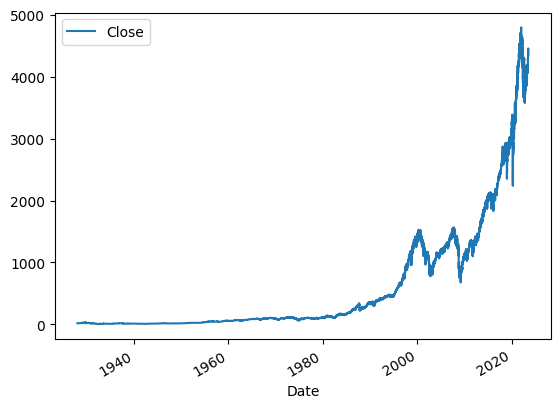

In [7]:
#Dates(x-axis) vs Closing value of the particular date
sp500.plot.line(y="Close",use_index=True)

In [8]:
del sp500["Dividends"]
del sp500["Stock Splits"]

#####FIXING TARGET



In [9]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [10]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-06-28 00:00:00-04:00,4367.479980,4390.350098,4360.220215,4376.859863,3739330000,4396.439941
2023-06-29 00:00:00-04:00,4374.939941,4398.390137,4371.970215,4396.439941,3696660000,4450.379883
2023-06-30 00:00:00-04:00,4422.439941,4458.479980,4422.439941,4450.379883,3923450000,4455.589844


In the above dataframe it shows the price value for tomorrow. Using this the target can be set for the model.

In [12]:
sp500["Target"]=(sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-06-28 00:00:00-04:00,4367.479980,4390.350098,4360.220215,4376.859863,3739330000,4396.439941,1
2023-06-29 00:00:00-04:00,4374.939941,4398.390137,4371.970215,4396.439941,3696660000,4450.379883,1
2023-06-30 00:00:00-04:00,4422.439941,4458.479980,4422.439941,4450.379883,3923450000,4455.589844,1


Going back too far in the historical data might not be useful in the future predictions.

In [14]:
sp500 = sp500.loc["1990-01-01":].copy()

In [15]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-06-28 00:00:00-04:00,4367.479980,4390.350098,4360.220215,4376.859863,3739330000,4396.439941,1
2023-06-29 00:00:00-04:00,4374.939941,4398.390137,4371.970215,4396.439941,3696660000,4450.379883,1
2023-06-30 00:00:00-04:00,4422.439941,4458.479980,4422.439941,4450.379883,3923450000,4455.589844,1


####Training an Initial ML model

In [16]:
#Rf works by training a bunch of individual DT with randomized parameters and then averaging the results from that decisions.
#Resistant to overfitting, it is possible but harder for them than others.

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)

train = sp500.iloc[:-100]

test = sp500.iloc[-100:]

predictors = ["Close","Volume","Open","High","Low"]

model.fit(train[predictors],train["Target"])



RandomForestClassifier(min_samples_split=100, random_state=1)

In [18]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [19]:
preds

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

In [20]:
#turn in to pandas series

import pandas as pd

preds = pd.Series (preds, index= test.index)

In [21]:
precision_score(test["Target"],preds)

0.6052631578947368

In [24]:
combined = pd.concat([test["Target"],preds],axis=1)

<Axes: xlabel='Date'>

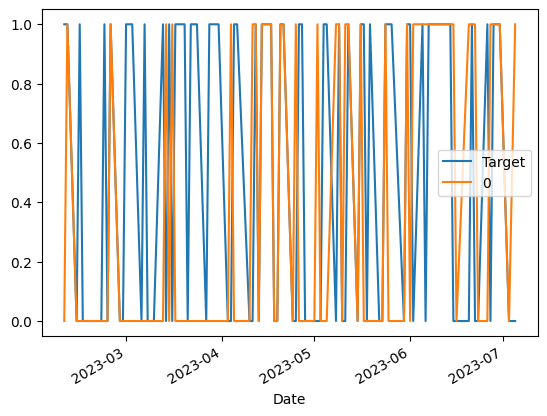

In [25]:
combined.plot()

Building Backtesting System

In [32]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [33]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)


In [34]:
predictions = backtest(sp500, model, predictors)


In [35]:
predictions["Predictions"].value_counts()


0    3433
1    2508
Name: Predictions, dtype: int64

In [36]:
precision_score(predictions["Target"], predictions["Predictions"])


0.529505582137161

The model displays 53% accuracy regarding stock price - market prediction.

#### % of the days the market wentup!

In [37]:
predictions["Target"].value_counts() / predictions.shape[0]


1    0.533917
0    0.466083
Name: Target, dtype: float64

In [38]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]

In [39]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])


In [40]:
sp500


,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28 00:00:00-04:00,4367.479980,4390.350098,4360.220215,4376.859863,3739330000,4396.439941,1,0.999823,1.0,1.003208,2.0,1.042400,31.0,1.092973,118.0,1.155335,533.0
2023-06-29 00:00:00-04:00,4374.939941,4398.390137,4371.970215,4396.439941,3696660000,4450.379883,1,1.002232,1.0,1.007025,2.0,1.045935,31.0,1.097193,119.0,1.160074,533.0
2023-06-30 00:00:00-04:00,4422.439941,4458.479980,4422.439941,4450.379883,3923450000,4455.589844,1,1.006097,2.0,1.014636,3.0,1.057301,32.0,1.109962,119.0,1.173857,533.0


In [41]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)


In [42]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [43]:
predictions = backtest(sp500, model, new_predictors)


In [44]:
predictions["Predictions"].value_counts()



0.0    4125
1.0     816
Name: Predictions, dtype: int64

In [45]:
precision_score(predictions["Target"], predictions["Predictions"])


0.5686274509803921

In [46]:
predictions["Target"].value_counts() / predictions.shape[0]


1    0.543817
0    0.456183
Name: Target, dtype: float64

The market prediction model works way less than the natural market predictability.

In [47]:
predictions


,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,1.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,1.0
...,...,...
2023-06-28 00:00:00-04:00,1,0.0
2023-06-29 00:00:00-04:00,1,0.0
2023-06-30 00:00:00-04:00,1,0.0


In [53]:
sp500.to_csv('sp500.csv')